In [27]:
import pandas as pd

# 'error_bad_lines=False' (for Pandas < 1.3.0) or 'on_bad_lines='skip''
data = pd.read_csv("cleaned_releases.csv", on_bad_lines='skip')

# Filter rows where the 'NAICS Title / Titre Code_SCIAN' column contains 'Fossil-fuel electric power generation'
filtered_data = data[data['NAICS Title / Titre Code_SCIAN'].str.contains("Fossil-fuel electric power generation", case=False, na=False)]

# Check the first few rows of the filtered data
print(filtered_data.head())

# Save the filtered data to a new CSV file (optional)
filtered_data.to_csv("filtered_fossil_fuel.csv", index=False)

<ipython-input-27-d658183525e0>:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("cleaned_releases.csv", on_bad_lines='skip')


     Reporting_Year / Année  NPRI_ID / No_INRP Number of employees  \
281                    2000                267                 117   
282                    2000                267                 117   
283                    2000                267                 117   
284                    2000                267                 117   
285                    2000                267                 117   

    Company_Name / Dénomination_sociale_de_l'entreprise  \
281                                Edmonton Power Inc.    
282                                Edmonton Power Inc.    
283                                Edmonton Power Inc.    
284                                Edmonton Power Inc.    
285                                Edmonton Power Inc.    

           Facility_Name / Installation  NAICS / Code_SCIAN  \
281  Genesee Thermal Generating Station              221112   
282  Genesee Thermal Generating Station              221112   
283  Genesee Thermal Generating Sta

In [28]:
import pandas as pd

# Read the saved CSV file
filtered_fossil_fuel = pd.read_csv("filtered_fossil_fuel.csv")

# Display the top 10 rows of the data in a table format
filtered_fossil_fuel.head(10)



Reporting_Year / Année  NPRI_ID / No_INRP  Number of employees  \
0                    2000                267                117.0   
1                    2000                267                117.0   
2                    2000                267                117.0   
3                    2000                267                117.0   
4                    2000                267                117.0   
5                    2000                267                117.0   
6                    2000                267                117.0   
7                    2000                267                117.0   
8                    2000                267                117.0   
9                    2000                267                117.0   

  Company_Name / Dénomination_sociale_de_l'entreprise  \
0                                Edmonton Power Inc.    
1                                Edmonton Power Inc.    
2                                Edmonton Power Inc.    
3                                Edmonton Power Inc.    
4                                Edmonton Power Inc.    
5                                Edmonton Power Inc.    
6                                Edmonton Power Inc.    
7                                Edmonton Power Inc.    
8                                Edmonton Power Inc.    
9                                Edmonton Power Inc.    

         Facility_Name / Installation  NAICS / Code_SCIAN  \
0  Genesee Thermal Generating Station              221112   
1  Genesee Thermal Generating Station              221112   
2  Genesee Thermal Generating Station              221112   
3  Genesee Thermal Generating Station              221112   
4  Genesee Thermal Generating Station              221112   
5  Genesee Thermal Generating Station              221112   
6  Genesee Thermal Generating Station              221112   
7  Genesee Thermal Generating Station              221112   
8  Genesee Thermal Generating Station              221112   
9  Genesee Thermal Generating Station              221112   

          NAICS Title / Titre Code_SCIAN PROVINCE     City  Latitude  \
0  Fossil-fuel electric power generation       AB  Warburg    53.344   
1  Fossil-fuel electric power generation       AB  Warburg    53.344   
2  Fossil-fuel electric power generation       AB  Warburg    53.344   
3  Fossil-fuel electric power generation       AB  Warburg    53.344   
4  Fossil-fuel electric power generation       AB  Warburg    53.344   
5  Fossil-fuel electric power generation       AB  Warburg    53.344   
6  Fossil-fuel electric power generation       AB  Warburg    53.344   
7  Fossil-fuel electric power generation       AB  Warburg    53.344   
8  Fossil-fuel electric power generation       AB  Warburg    53.344   
9  Fossil-fuel electric power generation       AB  Warburg    53.344   

   Longitude CAS_Number / No_CAS  \
0   -114.305            118-74-1   
1   -114.305           7647-01-0   
2   -114.305           7664-39-3   
3   -114.305           7664-93-9   
4   -114.305             NA - 04   
5   -114.305             NA - 06   
6   -114.305             NA - 08   
7   -114.305             NA - 09   
8   -114.305             NA - 10   
9   -114.305             NA - 11   

  Substance Name (English) / Nom de substance (Anglais) Units / Unités  \
0                                  Hexachlorobenzene             grams   
1                                  Hydrochloric acid            tonnes   
2                                  Hydrogen fluoride            tonnes   
3                                     Sulphuric acid            tonnes   
4                       Chromium (and its compounds)            tonnes   
5                         Copper (and its compounds)            tonnes   
6                           Lead (and its compounds)            tonnes   
7                      Manganese (and its compounds)            tonnes   
8                        Mercury (and its compounds)                kg   
9            

In [29]:
# Convert the 'Reporting_Year / Année' column to datetime if it's not already in that format
data['Reporting_Year / Année'] = pd.to_datetime(data['Reporting_Year / Année'], format='%Y')

# Sort data by 'Reporting_Year / Année' in ascending order
data = data.sort_values(by='Reporting_Year / Année')

# Check the structure of the dataset
print(data.head())


     Reporting_Year / Année  NPRI_ID / No_INRP Number of employees  \
0                2000-01-01                  1                 440   
6187             2000-01-01               3901                 209   
6188             2000-01-01               3901                 209   
6189             2000-01-01               3901                 209   
6190             2000-01-01               3901                 209   

     Company_Name / Dénomination_sociale_de_l'entreprise  \
0                Alberta-Pacific Forest Industries Inc.    
6187                                       PETRO-CANADA    
6188                                       PETRO-CANADA    
6189                                       PETRO-CANADA    
6190                                       PETRO-CANADA    

     Facility_Name / Installation  NAICS / Code_SCIAN  \
0                         (blank)              322112   
6187            OAKVILLE REFINERY              324110   
6188            OAKVILLE REFINERY              

In [30]:
# Load your cleaned dataset
df = pd.read_csv("filtered_fossil_fuel.csv")

# List of substances to create new columns for WHICH ARE RELATED TO OUR PROBLEM
substances = [
    "Sulphur dioxide (SO₂)", "Nitrogen oxides (expressed as nitrogen dioxide)", "Carbon monoxide (CO)",
    "Total particulate matter", "PM10 - Particulate Matter ≤ 10 Micrometers",
    "PM2.5 - Particulate Matter ≤ 2.5 Micrometers", "Volatile Organic Compounds (VOCs)", "Mercury (and its compounds)",
    "Lead (and its compounds)", "Chromium (and its compounds)", "Nickel (and its compounds)",
    "Hydrogen fluoride (HF)", "Hydrochloric acid", "Benzo[a]pyrene", "Fluoranthene", "Naphthalene", "Phenanthrene",
    "Pyrene", "Anthracene", "Chrysene", "Dioxins and furans - total"
]

# Initialize new columns with 0
for substance in substances:
    df[substance] = 0

# Fill the new columns with corresponding emission values
for substance in substances:
    df.loc[df["Substance Name (English) / Nom de substance (Anglais)"] == substance, substance] = df[
        "Release to Air - Stack / Point"
    ]

# Replace NaN values with 0 in the new columns
df[substances] = df[substances].fillna(0)

# Display the first few rows to verify
df.head()

<ipython-input-30-5e18610c5bc8>:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[13316.47      363.24      542.822   ...    55.         72.62644
   149.0212 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["Substance Name (English) / Nom de substance (Anglais)"] == substance, substance] = df[
<ipython-input-30-5e18610c5bc8>:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[        nan 1.04975e+03         nan ... 2.80000e-02 9.30630e-01
 4.96350e-01]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["Substance Name (English) / Nom de substance (Anglais)"] == substance, substance] = df[
<ipython-input-30-5e18610c5bc8>:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a futu

Reporting_Year / Année  NPRI_ID / No_INRP  Number of employees  \
0                    2000                267                117.0   
1                    2000                267                117.0   
2                    2000                267                117.0   
3                    2000                267                117.0   
4                    2000                267                117.0   

  Company_Name / Dénomination_sociale_de_l'entreprise  \
0                                Edmonton Power Inc.    
1                                Edmonton Power Inc.    
2                                Edmonton Power Inc.    
3                                Edmonton Power Inc.    
4                                Edmonton Power Inc.    

         Facility_Name / Installation  NAICS / Code_SCIAN  \
0  Genesee Thermal Generating Station              221112   
1  Genesee Thermal Generating Station              221112   
2  Genesee Thermal Generating Station              221112   
3  Genesee Thermal Generating Station              221112   
4  Genesee Thermal Generating Station              221112   

          NAICS Title / Titre Code_SCIAN PROVINCE     City  Latitude  ...  \
0  Fossil-fuel electric power generation       AB  Warburg    53.344  ...   
1  Fossil-fuel electric power generation       AB  Warburg    53.344  ...   
2  Fossil-fuel electric power generation       AB  Warburg    53.344  ...   
3  Fossil-fuel electric power generation       AB  Warburg    53.344  ...   
4  Fossil-fuel electric power generation       AB  Warburg    53.344  ...   

   Hydrogen fluoride (HF) Hydrochloric acid Benzo[a]pyrene Fluoranthene  \
0                       0             0.000            0.0          0.0   
1                       0            24.376            0.0          0.0   
2                       0             0.000            0.0          0.0   
3                       0             0.000            0.0          0.0   
4                       0             0.000            0.0          0.0   

  Naphthalene  Phenanthrene  Pyrene  Anthracene  Chrysene  \
0         0.0           0.0     0.0         0.0       0.0   
1         0.0           0.0     0.0         0.0       0.0   
2         0.0           0.0     0.0         0.0       0.0   
3         0.0           0.0     0.0         0.0       0.0   
4         0.0           0.0     0.0         0.0       0.0   

   Dioxins and furans - total  
0                         0.0  
1                         0.0  
2                         0.0  
3                         0.0  
4                         0.0  

[5 rows x 37 columns]

In [32]:
import pandas as pd

# Assuming your dataset is loaded into 'df'

# List of substances REALTED TO PROBLEM
substances = [
    "Sulphur dioxide (SO₂)", "Nitrogen oxides (expressed as nitrogen dioxide)", "Carbon monoxide (CO)",
    "Total particulate matter", "PM10 - Particulate Matter ≤ 10 Micrometers",

]

# Define a function to categorize emission values
def categorize_emission(value, column_name):
    # Calculate percentiles for each pollutant (using column-specific values)
    percentile_25 = df[column_name].quantile(0.25)
    percentile_75 = df[column_name].quantile(0.75)

    # Classify based on quantiles
    if value <= percentile_25:
        return 'Low'
    elif value >= percentile_75:
        return 'High'
    else:
        return 'Medium'

# Iterate over all substances and apply the categorization
for substance in substances:
    # Create a new column for each pollutant's classification
    df[f'{substance}_class'] = df[substance].apply(lambda x: categorize_emission(x, substance))

# Verify the changes by checking the first few rows of the dataframe
print(df.head())



   Reporting_Year / Année  NPRI_ID / No_INRP  Number of employees  \
0                    2000                267                117.0   
1                    2000                267                117.0   
2                    2000                267                117.0   
3                    2000                267                117.0   
4                    2000                267                117.0   

  Company_Name / Dénomination_sociale_de_l'entreprise  \
0                                Edmonton Power Inc.    
1                                Edmonton Power Inc.    
2                                Edmonton Power Inc.    
3                                Edmonton Power Inc.    
4                                Edmonton Power Inc.    

         Facility_Name / Installation  NAICS / Code_SCIAN  \
0  Genesee Thermal Generating Station              221112   
1  Genesee Thermal Generating Station              221112   
2  Genesee Thermal Generating Station              221112  

<ipython-input-33-834080f263a3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=classification_column, palette='coolwarm')


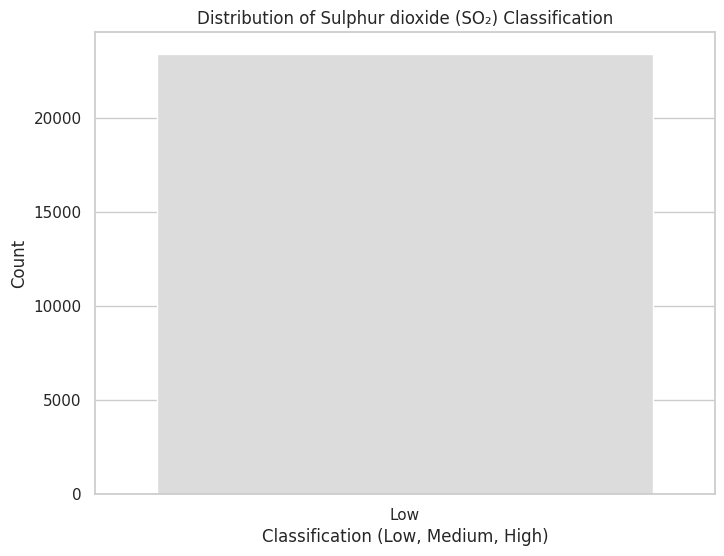

<ipython-input-33-834080f263a3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=classification_column, palette='coolwarm')


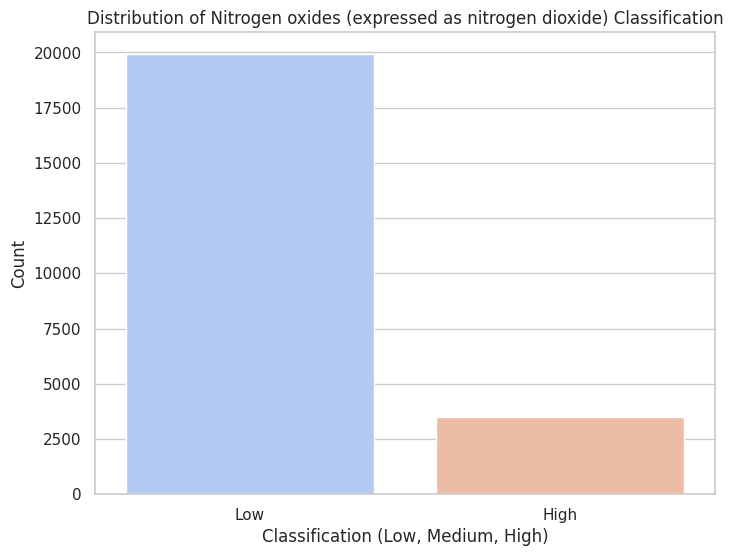

<ipython-input-33-834080f263a3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=classification_column, palette='coolwarm')


<ipython-input-33-834080f263a3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=classification_column, palette='coolwarm')


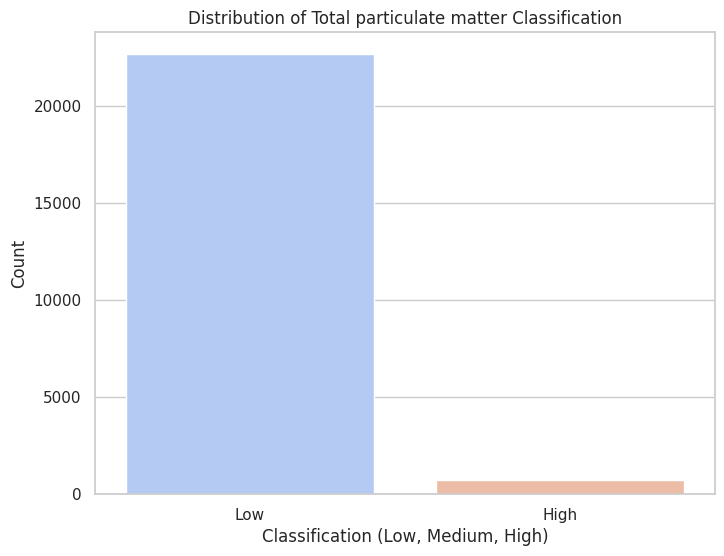

<ipython-input-33-834080f263a3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=classification_column, palette='coolwarm')


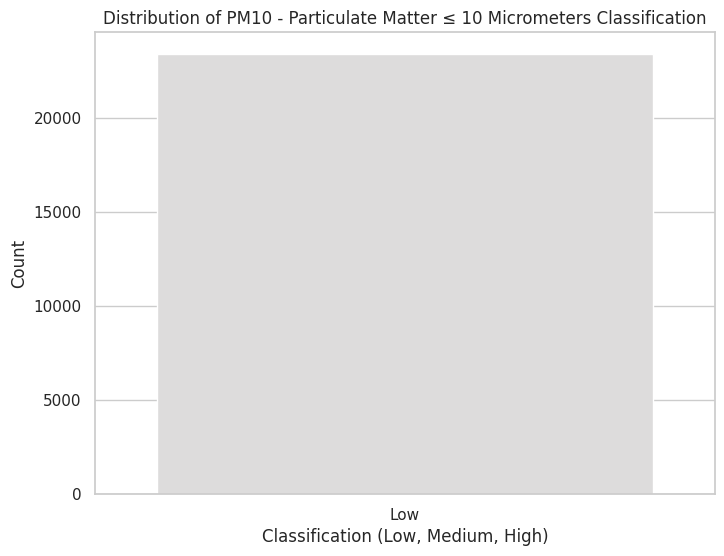

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn to make plots look nicer
sns.set(style="whitegrid")

# Visualizing the distribution of classifications for each substance
def plot_classification_distribution(substance):
    # Plot the classification counts for each pollutant
    plt.figure(figsize=(8, 6))
    classification_column = f"{substance}_class"
    sns.countplot(data=df, x=classification_column, palette='coolwarm')
    plt.title(f'Distribution of {substance} Classification')
    plt.xlabel('Classification (Low, Medium, High)')
    plt.ylabel('Count')
    plt.show()

# Plot the classification distribution for a few selected substances
for substance in substances[:5]:  # You can adjust this range to plot more or fewer substances
    plot_classification_distribution(substance)

# Pie chart for the overall pollutant classification
def plot_pie_chart():
    plt.figure(figsize=(8, 6))
    # Count classifications for each pollutant
    classification_counts = df[[f'{substance}_class' for substance in substances]].apply(pd.Series.value_counts, axis=0).fillna(0)

    # Sum up counts across all pollutants
    total_counts = classification_counts.sum(axis=1)

    # Plot pie chart
    total_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("coolwarm", n_colors=3))
    plt.title('Overall Distribution of Classifications (Low, Medium, High)')
    plt.ylabel('')
    plt.show()

# Plot the pie chart for overall classification
plot_pie_chart()


In [40]:
# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Rename columns with problematic characters if necessary
df.rename(columns={
    'Reporting_Year / AnnÃ©e': 'Reporting_Year',
    'Substance Name (English) / Nom de substance (Anglais)': 'Substance_Name',
    'Release to Air - Stack / Point': 'Release_to_Air_Stack_Point'
}, inplace=True)

# Now group by Substance_Name and sum emissions for that substance
emissions_by_substance = df.groupby(['Substance_Name'])['Release_to_Air_Stack_Point'].sum().reset_index()

# Sort values to make it easier to visualize
emissions_by_substance = emissions_by_substance.sort_values(by='Release_to_Air_Stack_Point', ascending=False)

# Display the top 10 substances with the highest emissions
print(emissions_by_substance.head(10))

# If you'd like to visualize this, we can create a bar plot:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(emissions_by_substance['Substance_Name'][:10], emissions_by_substance['Release_to_Air_Stack_Point'][:10])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Substance')
plt.ylabel('Total Emission')
plt.title('Top 10 Substances by Emission')
plt.tight_layout()
plt.show()



                                     Substance_Name  \
75                                  Sulphur dioxide   
63  Nitrogen oxides (expressed as nitrogen dioxide)   
22                                  Carbon monoxide   
81                         Total particulate matter   
65      PM10 - Particulate Matter <= 10 Micrometers   
48                                Hydrochloric acid   
66    PM2.5 - Particulate Matter <= 2.5 Micrometers   
46                                Hexachlorobenzene   
77                                   Sulphuric acid   
53                         Lead (and its compounds)   

    Release_to_Air_Stack_Point  
75                7.208606e+06  
63                3.597999e+06  
22                5.894691e+05  
81                4.538800e+05  
65                1.958139e+05  
48                1.475162e+05  
66                9.561330e+04  
46                6.335163e+04  
77                4.203740e+04  
53                3.584574e+04  


AttributeError: 'Axes' object has no attribute 'set_rotation'

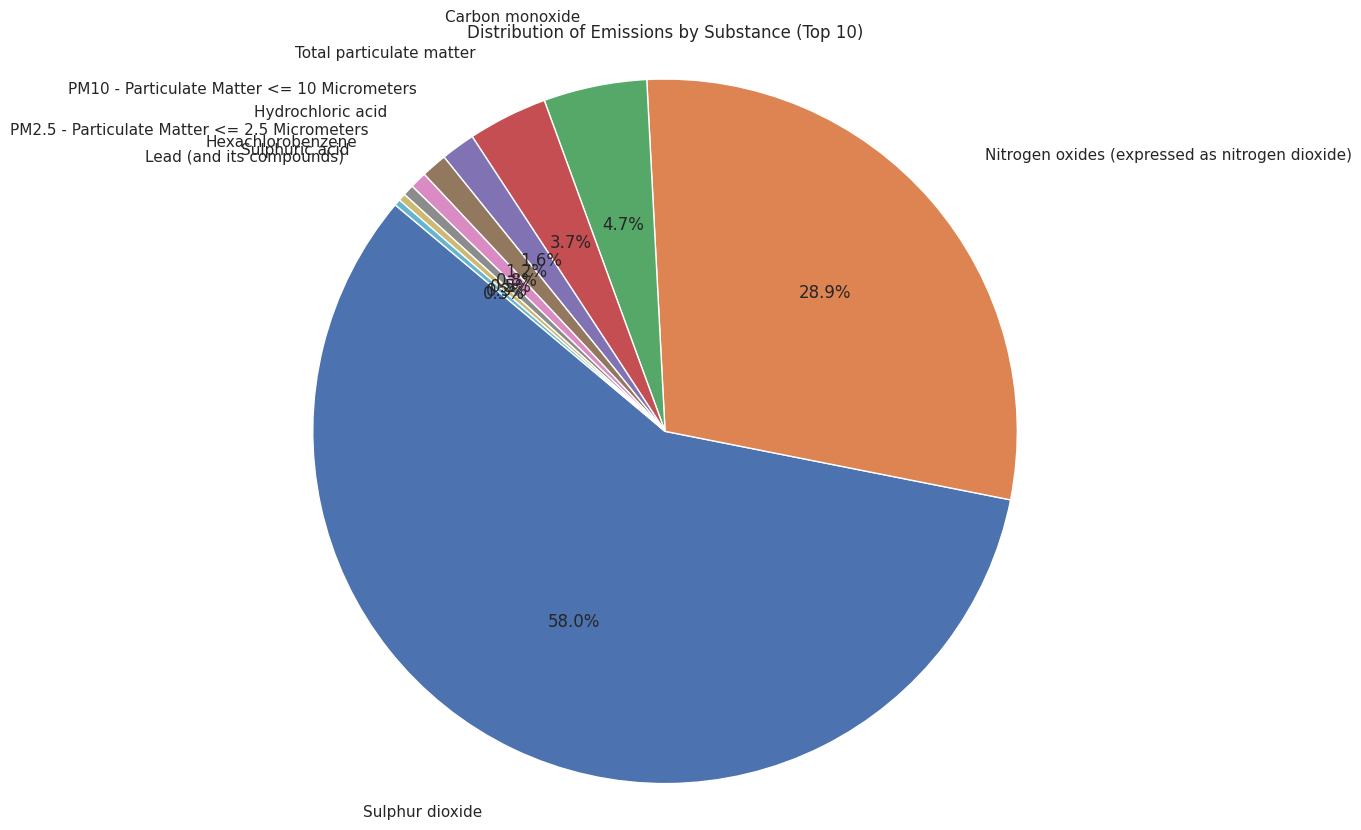

In [45]:
plt.figure(figsize=(10, 10))
plt.pie(top_10_substances['Release_to_Air_Stack_Point'],
        labels=top_10_substances['Substance_Name'],
        autopct='%1.1f%%',
        startangle=140,
        labeldistance=1.2)  # Adjust label distance to avoid overlap
plt.title('Distribution of Emissions by Substance (Top 10)')
plt.axis('equal')

# Rotate the labels
plt.gca().set_rotation(90)  # Rotate labels 90 degrees
plt.show()




In [46]:
import plotly.express as px

# Treemap of emissions by substance
fig = px.treemap(emissions_by_substance,
                 path=['Substance_Name'],
                 values='Release_to_Air_Stack_Point',
                 title="Emissions by Substance")
fig.show()


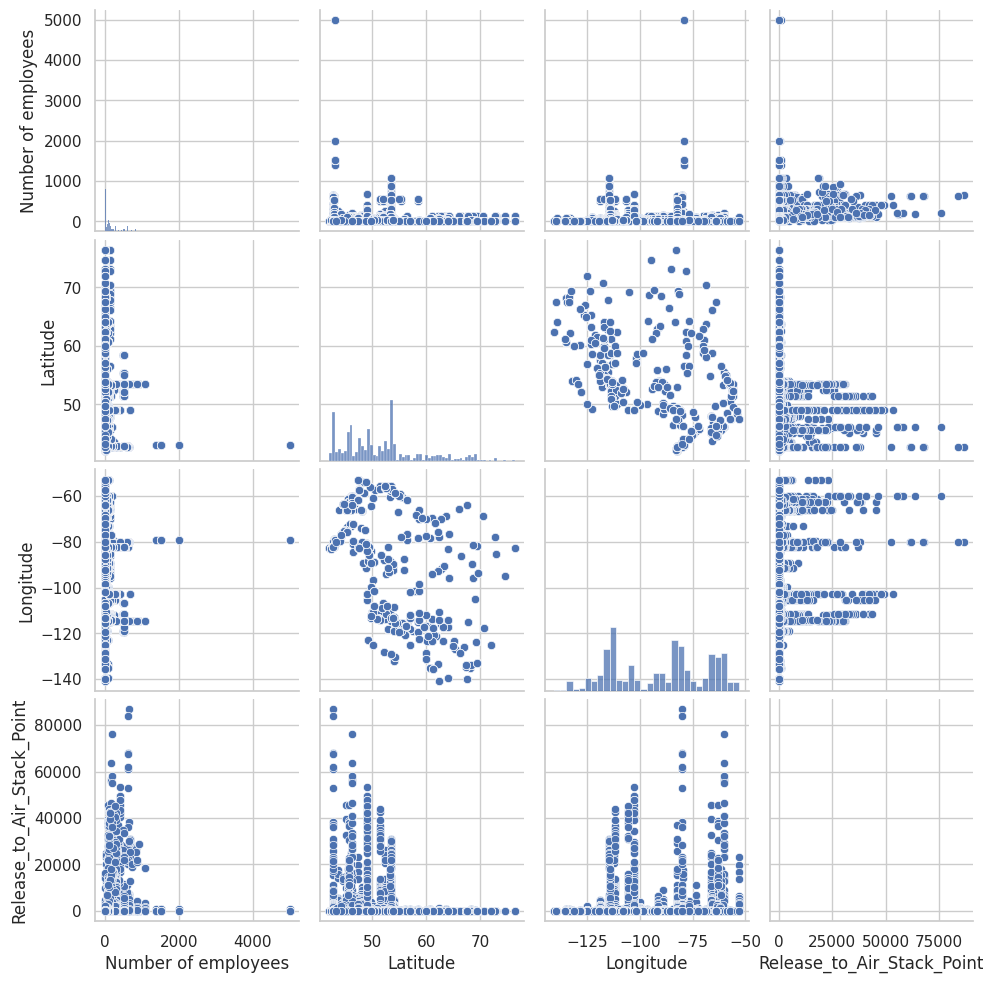

In [49]:
import seaborn as sns

# Select relevant numeric columns for pairplot
df_subset = df[['Number of employees', 'Latitude', 'Longitude', 'Release_to_Air_Stack_Point']]

# Plot pairplot
sns.pairplot(df_subset)
plt.show()


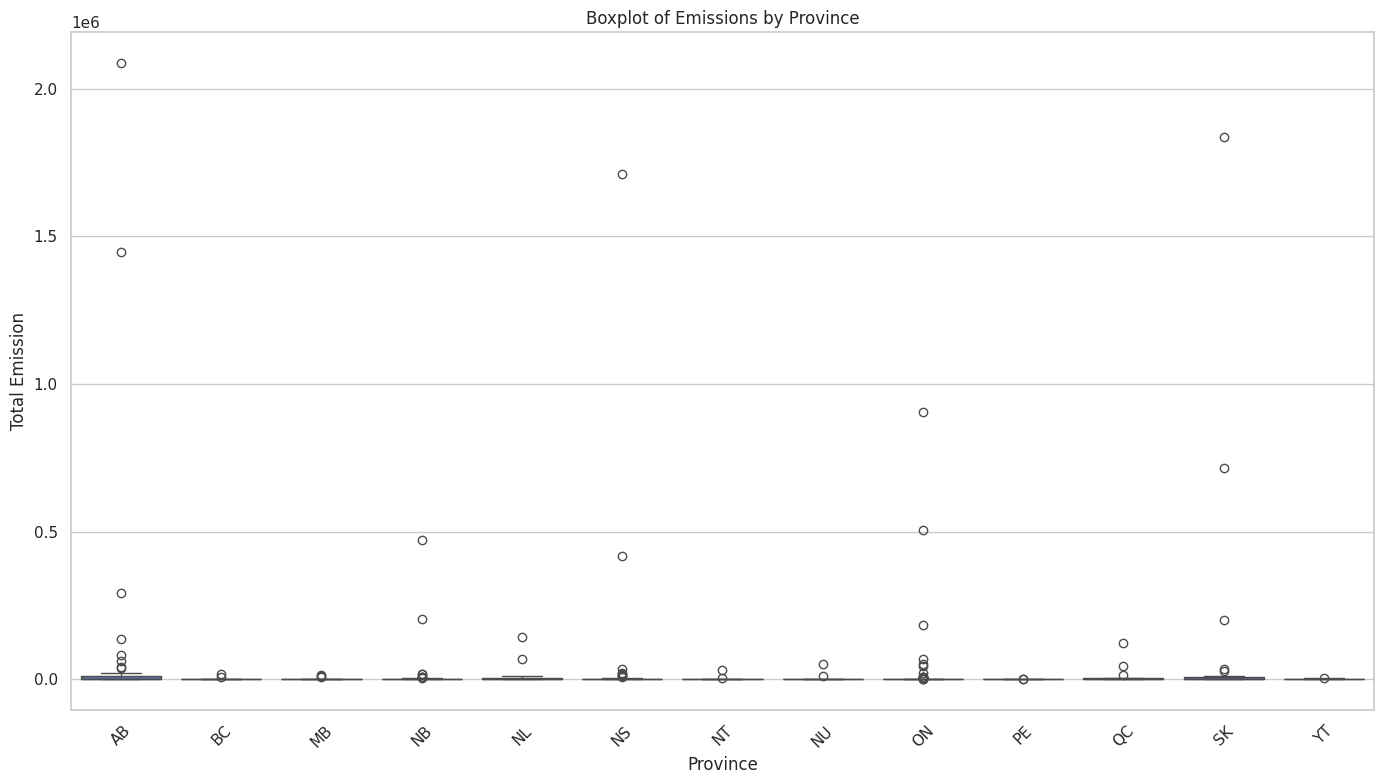

In [50]:
# Grouping data by Province and Substance to get an overview of emissions distribution
province_emissions = df.groupby(['PROVINCE', 'Substance_Name'])['Release_to_Air_Stack_Point'].sum().reset_index()

# Create a boxplot for emissions by province
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.boxplot(x='PROVINCE', y='Release_to_Air_Stack_Point', data=province_emissions)
plt.xticks(rotation=45)
plt.xlabel('Province')
plt.ylabel('Total Emission')
plt.title('Boxplot of Emissions by Province')
plt.tight_layout()
plt.show()
